# Clustering lab
## Using clustering to find best store locations

Imagine the following problem:<br>
You own the pizza chain, and you collected data about pizza deliveries in a certain neighborhood. The data contains a coordinate of each delivery as a pair *(Latitude,Longitude)*. You do not have any stores in this neighborhood, and driving there takes a lot of resources from your business. So you decide to open $K$ new stores in this area. The goal is, based on the frequent delivery data, determine the best locations for the new stores.

You need to perform the $K$-means clustering of delivery locations, and otput the best location for $K$ new stores. How would you choose the location of the store within each cluster that minimizes the overall distancebetween the store and the delivery address?

The data is 2-dimensional and it is easy to plot it to see if the locations of new stores make sense.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import pandas as pd
import numpy as np

The data is a real data collected by [this person](https://github.com/angelddaz) while working as a pizza delivery driver. The file [pizza_delivery_locations.csv](https://docs.google.com/spreadsheets/d/1guQN-_EykRqqlY2R3uYfopNX9pc8p-E8oHJr-RTXtQU/edit?usp=sharing) is a subset of the original data and contains only *(Latitude,Longitude)* of each delivery address. Download the file and update the path below.

In [2]:
data_file = "../data_ml_2020/pizza_delivery_locations.csv"

In [3]:
data = pd.read_csv(data_file)
columns=data.columns
print(data.columns)
len(data)

# convert dataframe to a 2D numpy array - it is easier to work with it
data = data.to_numpy()

Index(['Latitude', 'Longitude'], dtype='object')


## Task 1.

Use $K$-means clustering algorithm to find the best locations for new pizza stores for $K$=2, $K$=3 and $K$=4. The answers should be represented as lists of *(Latitide,Longitude)* tuples for each value of $K$.

You can use the custom code from the k-means demo, or you can use the `sklearn.KMeans` module to perform clustering.

In [4]:
# clustering code for 2,3 and 4 clusters
from sklearn.cluster import KMeans
K=4
k_means=KMeans(K)
prediction=k_means.fit_predict(data)

In [5]:
# Extracting best store locations for each cluster of addresses
centroids = k_means.cluster_centers_
print(centroids)

[[  43.66395605 -116.26687948]
 [  43.63263042 -116.20979217]
 [  43.64181413 -116.24036593]
 [  43.723879   -116.255046  ]]


## Task 2
Visualize clusters by plotting each data point and coloring it with the different color according to the cluster to which it belongs. Also plot the locations of new stores for each value of $K$. Some examples of the final visualizations are given below.

In [6]:
import matplotlib.pyplot as plt

## Examples of cluster visualization in 2D

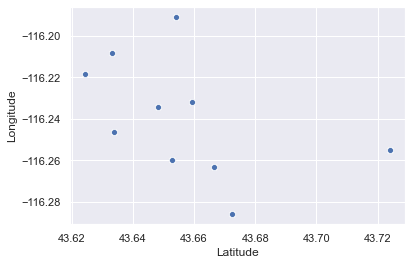

In [7]:
# Plotting original data
X=[]
Y=[]
origdata=pd.DataFrame(data=data,columns=columns)
sns.scatterplot(data=origdata,x="Latitude",y="Longitude")
plt.show()

       Latitude   Longitude  store
0     43.666573 -116.263356    0.0
1     43.652722 -116.259743    0.0
2     43.624462 -116.218350    1.0
3     43.666573 -116.263356    0.0
4     43.666573 -116.263356    0.0
...         ...         ...    ...
1296  43.624462 -116.218350    1.0
1297  43.672328 -116.286124    0.0
1298  43.652722 -116.259743    0.0
1299  43.648076 -116.234130    2.0
1300  43.659428 -116.231891    2.0

[1301 rows x 3 columns]


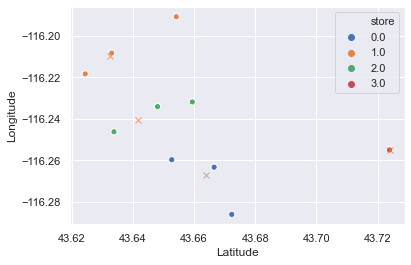

In [31]:
# Plotting clusters with centers
init=0
for i in range(len(data)):
    s=[data[i]]
    s=np.concatenate((s,[np.array([prediction[i]])]),axis=1)
    if(init==0):
        init=1
        dataandprediction=[s[0]]
    else:
        dataandprediction=np.concatenate((dataandprediction,[s[0]]),axis=0)
columns=['Latitude', 'Longitude','store']
newdata=pd.DataFrame(data=dataandprediction,columns=columns)
print(newdata)
sns.scatterplot(data=newdata,x="Latitude",y="Longitude",hue="store",palette="deep")
stores=pd.DataFrame(data=centroids,columns=['Latitude','Longitude'])
sns.scatterplot(data=stores,x="Latitude",y="Longitude",marker="x")

Copyright &copy; 2020 Marina Barsky. All rights reserved.